In [146]:
import numpy as np

from time import time

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from itertools import product

In [164]:
def random_mixture_values(shape=(5,)):
    # State
    constant_1 = 0.2
    constant_2 = 0.8
    mu = 0
    sig = 1
    
    # Utils
    rand_norm = lambda: np.random.normal(mu, sig)
    
    # Functionality
    data = []
    classes = []
    for  _ in range(shape[0]):
        subdata = []
        for _ in range(shape[1]):
            subdata.append(constant_1*rand_norm() + constant_2*rand_norm())
        
        norm = np.linalg.norm(subdata)
        
        if norm > 0.5:
            classes.append(1)
        else:
            classes.append(0)
            
        data.append(subdata)
        
    
    return np.array(data), classes
    
assert(random_mixture_values(shape=(6, 2))[0].shape == (6, 2))
# assert(set(np.unique(random_mixture_values(shape=(6, 2))[1])) == set([0, 1]))

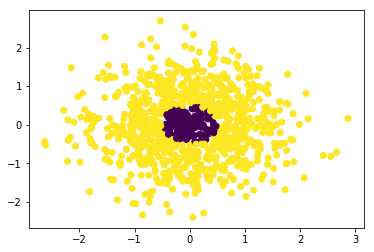

In [165]:
raw_data, classes = random_mixture_values(shape=(1000,2))
plt.scatter(raw_data[:, 0], raw_data[:, 1], c=classes)
plt.show()

In [124]:
def svc_runner(n, **clf_kwargs):
    raw_data, classes = random_mixture_values(shape=(n,2))
    x_train, x_test, y_train, y_test = train_test_split(raw_data, classes, test_size=0.2)

    if len(clf_kwargs)==0:
        clf = SVC(C=1.0, kernel='rbf', gamma='auto')
    else
        clf = SVC(**clf_kwargs)

    train_start = time()
    clf.fit(x_train, y_train)
    train_time = time() - train_start
    
    classify_start = time()
    y_pred = clf.predict(x_test)
    classify_time = time() - classify_start
    
    score = accuracy_score(y_pred, y_test)
    
    return (train_time, classify_time, score)

def test_battery(n_levels, trials=5, factors={}):
    results = []
    for n_level in n_levels:
        print("Running with n={}".format(int(n_level)))
        trial_results = []
        for i in range(trials):
            print("Iteration {} of {}".format(i, trials))
            train_time, classify_time, score = svc_runner(int(n_level))
            trial_results.append([train_time, classify_time, score])
        
        print("Done.")
        results.append(np.sum(trial_results, axis=0)/float(trials))
    
    return np.array(results)

In [125]:
levels = np.logspace(2, 5, 10)
results = test_battery(levels)

Running with n=100
Iteration 0 of 5
Iteration 1 of 5
Iteration 2 of 5
Iteration 3 of 5
Iteration 4 of 5
Done.
Running with n=215
Iteration 0 of 5
Iteration 1 of 5
Iteration 2 of 5
Iteration 3 of 5
Iteration 4 of 5
Done.
Running with n=464
Iteration 0 of 5
Iteration 1 of 5
Iteration 2 of 5
Iteration 3 of 5
Iteration 4 of 5
Done.
Running with n=1000
Iteration 0 of 5
Iteration 1 of 5
Iteration 2 of 5
Iteration 3 of 5
Iteration 4 of 5
Done.
Running with n=2154
Iteration 0 of 5
Iteration 1 of 5
Iteration 2 of 5
Iteration 3 of 5
Iteration 4 of 5
Done.
Running with n=4641
Iteration 0 of 5
Iteration 1 of 5
Iteration 2 of 5
Iteration 3 of 5
Iteration 4 of 5
Done.
Running with n=10000
Iteration 0 of 5
Iteration 1 of 5
Iteration 2 of 5
Iteration 3 of 5
Iteration 4 of 5
Done.
Running with n=21544
Iteration 0 of 5
Iteration 1 of 5
Iteration 2 of 5
Iteration 3 of 5
Iteration 4 of 5
Done.
Running with n=46415
Iteration 0 of 5
Iteration 1 of 5
Iteration 2 of 5
Iteration 3 of 5
Iteration 4 of 5
Done.
R

In [145]:
np.save("time_results", results)

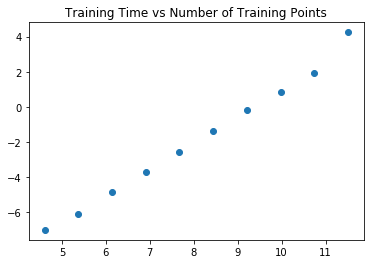

Log-log coefficient: 1.5590880649603411


In [155]:
# The log-log plot of training time is linear.
# This implies the training time is polynomial with degree ~2

plt.scatter(np.log(levels), np.log(results[:, 0]))
plt.title("Training Time vs Number of Training Points")
plt.show()

coeff = np.polyfit(np.log(levels), np.log(results[:, 0]), deg=1)[0]
print("Log-log coefficient: {}".format(coeff))

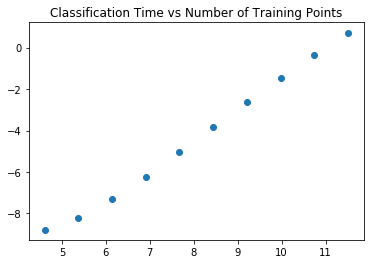

Log-log coefficient: 1.4335392930189779


In [154]:
# Classification time appears the same, polynomial
# complexity with a degree <2

plt.scatter(np.log(levels), np.log(results[:, 1]))
plt.title("Classification Time vs Number of Training Points")
plt.show()

coeff = np.polyfit(np.log(levels), np.log(results[:, 1]), deg=1)[0]
print("Log-log coefficient: {}".format(coeff))

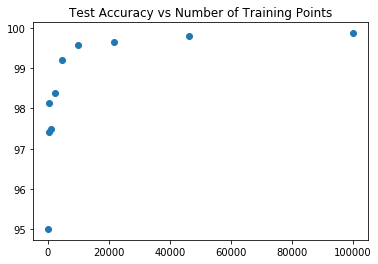

In [142]:
# Exponential increase in accuracy with lower number
# but almost no gain after crossing the 10^4 mark.

plt.scatter(levels, (results[:, 2]*100))
plt.title("Test Accuracy vs Number of Training Points")
plt.show()

In [156]:
raw_data, classes = random_mixture_values(shape=(100,2))
x_train, x_test, y_train, y_test = train_test_split(raw_data, classes, test_size=0.2)

if len(clf_kwargs)==0:
    clf = SVC(C=1.0, kernel='rbf', gamma='auto')
else
    clf = SVC(**clf_kwargs)

train_start = time()
clf.fit(x_train, y_train)
train_time = time() - train_start

classify_start = time()
y_pred = clf.predict(x_test)
classify_time = time() - classify_start

score = accuracy_score(y_pred, y_test)

return (train_time, classify_time, score)


SyntaxError: invalid syntax (<ipython-input-156-814781b0b478>, line 6)